In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [44]:
happiness = pd.read_csv("happiness_index.csv")

In [45]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [46]:
happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [47]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


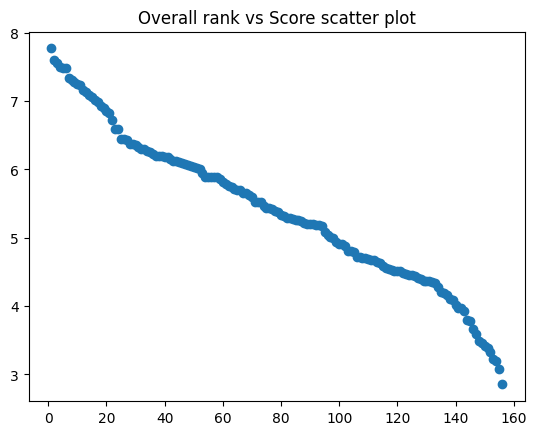

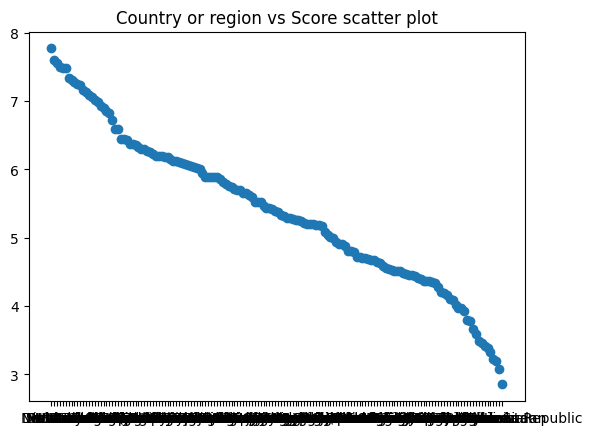

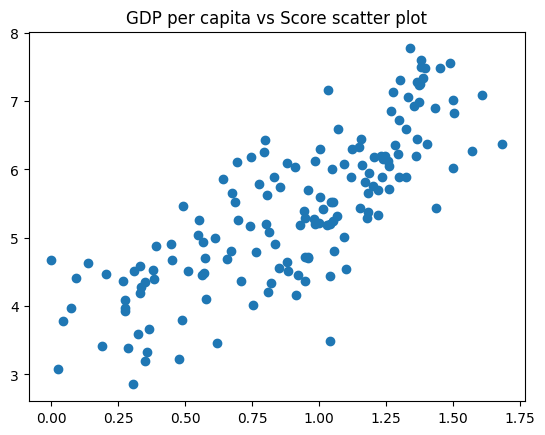

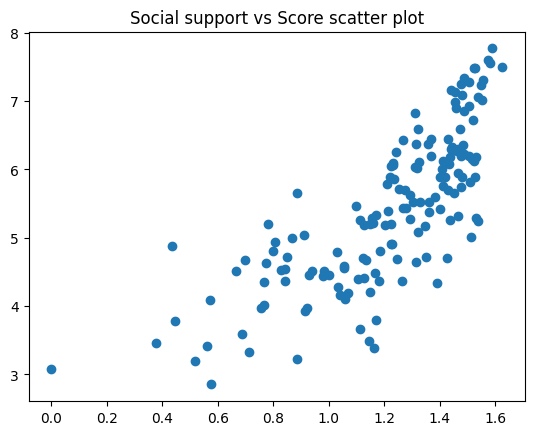

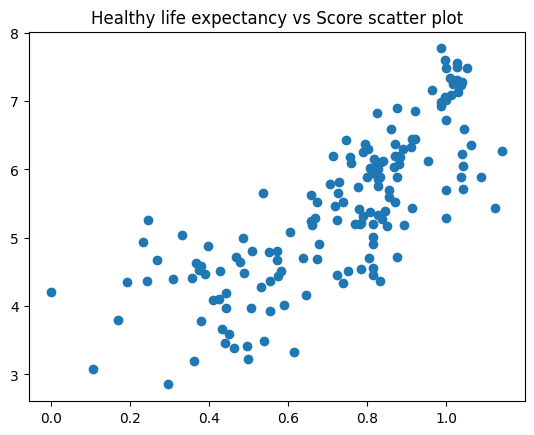

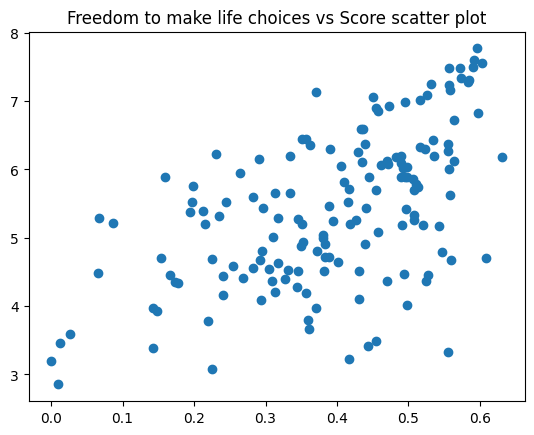

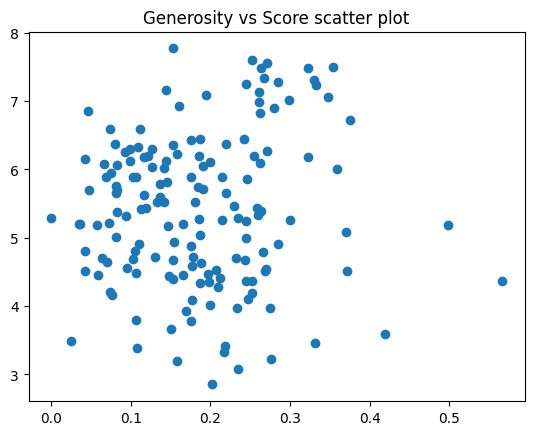

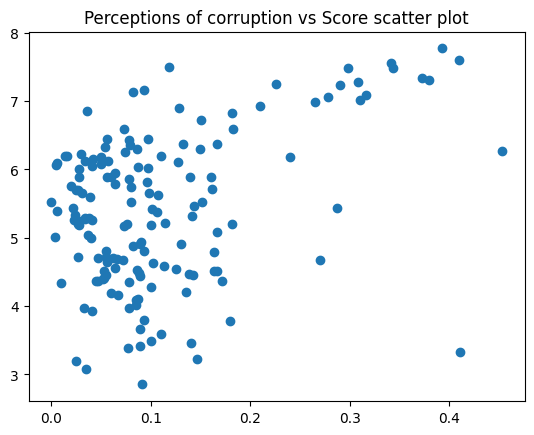

In [48]:
frame = ['Overall rank','Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity' , 'Perceptions of corruption']
for col in frame:
    plt.scatter(happiness[col], happiness['Score'])
    plt.title(f'{col} vs Score scatter plot')
    plt.show()

'Overall rank' and 'Country or region' are too linear as there is a unique value for each row.  These features will not be used.

Generosity is not linear.  It will not be used in the model.

Perceptions of Corruption is a weak linear model.  This will be used for now.

The features that will be used are 'GDP Per Capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption' 

In [49]:
# Choose which features you would like to use in your model and assign to a variable.
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']

In [50]:
# Split your dataset into features and targets and then into train and test sets.

X = happiness[features]
y = happiness['Score']

X_train, X_test, y_train, y_test= train_test_split(X, y)

In [51]:
#Normalizing data 

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Instantiate the linear regression model
lr = LinearRegression()

In [53]:
# Fit the linear regression model

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [54]:
# Make predictions on your test using the linear regression model you just fitted

predictions = lr.predict(X_test_scaled)

In [55]:
# What are the coefficents of this model? What is the intercept?

print(f"coefficients: {lr.coef_}")
print(f"intercept: {lr.intercept_}")

coefficients: [1.18910496 1.80212661 1.16416488 0.8284485  0.6642023 ]
intercept: 1.9399874479248962


In [56]:
# Get the r2 score for your model. Does it seem like your model is performing well?

lr.score(X_test_scaled, y_test)

0.7247172037865086

R2 model scored 72% which is ok but could be better

Text(0, 0.5, 'Residual')

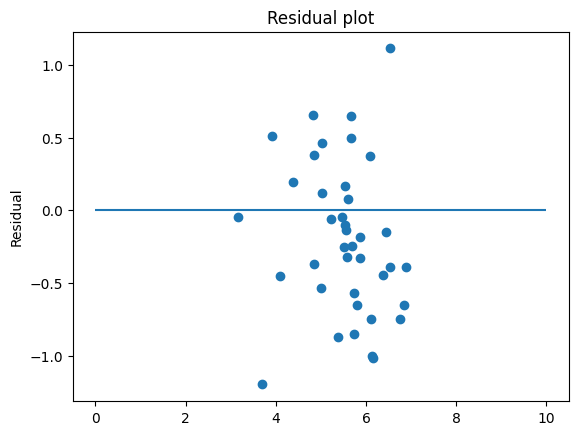

In [57]:
# Graph the residual. Do you see any patterns?
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin = 0, xmax = 10) 
plt.title('Residual plot')
plt.ylabel('Residual')

The pattern is pretty random which indicates that the linear model was a pretty good fit for this data

In [64]:
#BONUS: next steps - What can you do to improve your model? Try one additional step to improve your model and get the score to see if the 
#model actually improved. 



In [ ]:
#Hyperparameter Tuning
lr = LinearRegression()
parameters = {"fit_intercept": [True, False],
              "copy_X": [True, False],
              "n_jobs": range(-1,10) ,
              "positive":  [True, False]
             }
grid = GridSearchCV(estimator=lr, param_grid = parameters )
grid.fit(X_train_scaled, y_train)
predictions = grid.predict(X_test_scaled)

In [65]:
grid.score(X_test_scaled, y_test)

0.7247172037865086

Hyperparameter tuning did not increase the score

In [67]:
#Removing features from the model
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

X = happiness[features]
y = happiness['Score']

X_train, X_test, y_train, y_test= train_test_split(X, y)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)

lr.fit(X_train_scaled, y_train)

lr.score(X_test_scaled, y_test)


0.7353398713397113

Yes!  Removing ''Perceptions of corruption'' fro the model increased the R2 score!

